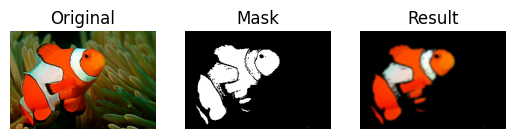

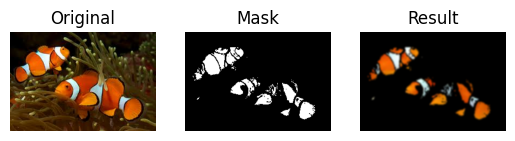

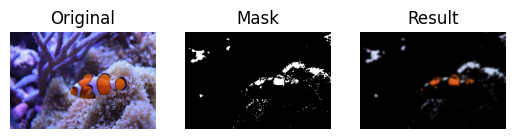

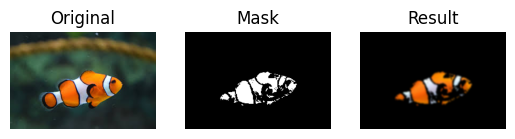

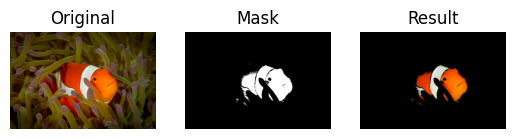

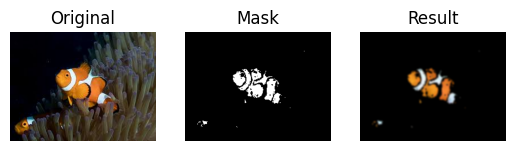

In [2]:
import matplotlib.pyplot as plt
import cv2

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

for i in range(6):
  nemo = cv2.imread("nemo"+str(i)+".jpg")
  nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
  nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV) # paso la imagen de RGB a HSV
  mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
  mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
  mask = mask_orange + mask_white # sumo ambas mascaras
  result = cv2.bitwise_and(nemo, nemo, mask=mask) # Aplico la mascara
  result = cv2.GaussianBlur(result, (7, 7), 0) # Blur

  plt.figure() # plot
  plt.subplot(1, 3, 1)
  plt.imshow(nemo)
  plt.axis("off")
  plt.title("Original")
  plt.subplot(1, 3, 2)
  plt.imshow(mask, cmap="gray")
  plt.axis("off")
  plt.title("Mask")
  plt.subplot(1, 3, 3)
  plt.imshow(result)
  plt.axis("off")
  plt.title("Result")
  plt.show()

El espacio de color HSV (Tono, Saturación y Valor) ofrece ventajas importantes para la segmentación de imágenes frente a espacios como RGB. Esto se debe a que en HSV el color se separa de la intensidad y de la pureza, lo que hace que la segmentación sea más estable y menos afectada por cambios en la iluminación.

En el código mostrado, este espacio de color se aprovecha para identificar los tonos naranja y blanco característicos de Nemo, el pez payaso. Gracias a esta separación, es posible generar máscaras precisas usando rangos de color bien definidos, algo más complicado en RGB, donde los valores de color están más mezclados. Por ello, HSV resulta especialmente útil cuando la iluminación no es uniforme o cuando se trabaja con objetos que tienen colores muy distintivos, como en el caso de Nemo.


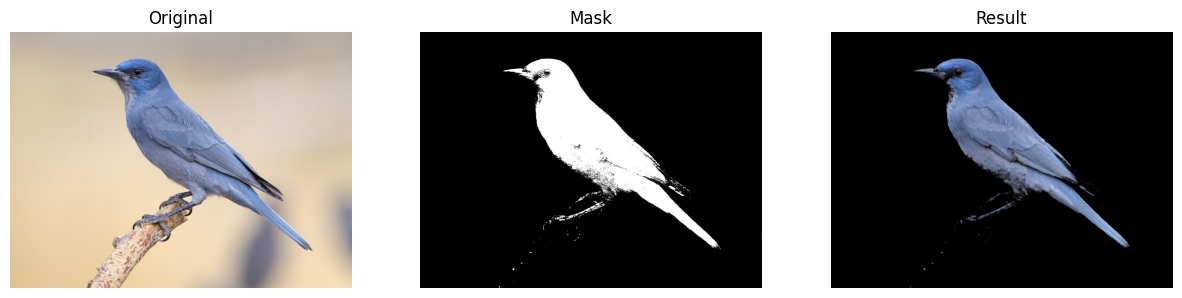

In [4]:
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import hsv_to_rgb
import numpy as np

light_white = (60, 50, 25)
dark_white = (180, 255, 255)

bird = cv2.imread("bird.jpg") # cargo la imagen
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)
bird_hsv = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV) # convierto a HSV
mask_white = cv2.inRange(bird_hsv, light_white, dark_white)
mask = mask_white
result = cv2.bitwise_and(bird, bird, mask=mask) # aplico la mascara
result = cv2.GaussianBlur(result, (7, 7), 0) # Blur

plt.figure(figsize=(15, 10)) # Plot
plt.subplot(1, 3, 1)
plt.imshow(bird)
plt.axis("off")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Mask")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.axis("off")
plt.title("Result")
plt.show()

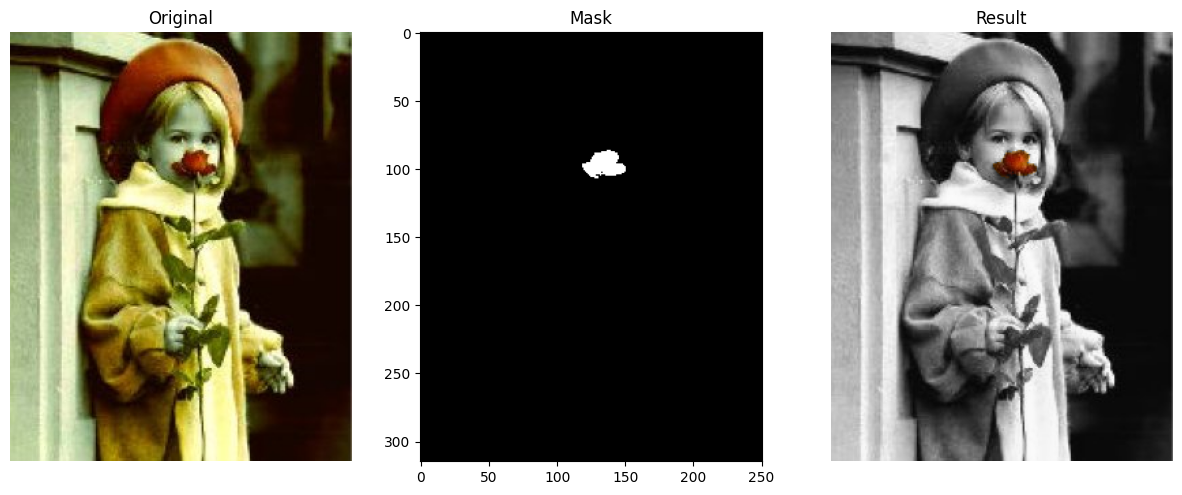

In [5]:
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import hsv_to_rgb
import numpy as np

light_rose = (1, 50, 40)  # Ajustar
dark_rose = (18, 255, 255)

girl = cv2.imread("Girl_and_rose.jpg")
girl = cv2.cvtColor(girl, cv2.COLOR_BGR2RGB)
girl_hsv = cv2.cvtColor(girl, cv2.COLOR_RGB2HSV)

mask_rose = cv2.inRange(girl_hsv, light_rose, dark_rose)
# Poner la máscara a cero fuera del rectángulo donde se que esta la rosa aproximadamente
mask_rose[0:75, :] = 0  # Fila superior
mask_rose[125:, :] = 0  # Fila inferior
mask_rose[:, 0:110] = 0  # Columna izquierda
mask_rose[:, 160:] = 0  # Columna derecha

gray_girl = cv2.cvtColor(girl, cv2.COLOR_RGB2GRAY) # Convertir la imagen a escala de grises
gray_girl = cv2.cvtColor(gray_girl, cv2.COLOR_GRAY2RGB)  # Convertir de nuevo a RGB para poder combinar

inv_mask_rose = cv2.bitwise_not(mask_rose)# Invertir la máscara de la rosa

gray_girl_masked = cv2.bitwise_and(gray_girl, gray_girl, mask=inv_mask_rose) # Aplicar la máscara invertida a la imagen en escala de grises
rose_masked = cv2.bitwise_and(girl, girl, mask=mask_rose) # Aplicar la máscara de la rosa a la imagen original

# Combinar la imagen en escala de grises con la rosa en color
final_image = cv2.add(gray_girl_masked, rose_masked)


plt.figure(figsize=(15, 10)) # plot
plt.subplot(1, 3, 1)
plt.imshow(girl)
plt.axis("off")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(mask_rose, cmap="gray")
plt.axis("on")
plt.title("Mask")
plt.subplot(1, 3, 3)
plt.imshow(final_image)
plt.axis("off")
plt.title("Result")
plt.show()

    El algoritmo k-means clustering es una técnica poderosa para la segmentación de color en imágenes. Este método trata cada píxel de la imagen como un punto en un espacio de color tridimensional (como RGB o LAB). El algoritmo comienza seleccionando k puntos al azar como centroides iniciales, donde k es el número deseado de segmentos de color. Luego, itera entre dos pasos: primero, asigna cada píxel al centroide más cercano basándose en la distancia en el espacio de color; segundo, recalcula la posición de cada centroide como el promedio de todos los píxeles asignados a él. Este proceso se repite hasta que los centroides se estabilizan o se alcanza un número máximo de iteraciones. El resultado es una imagen donde cada píxel se ha reasignado al color de su centroide final, efectivamente reduciendo la imagen a k colores distintos. Esta técnica es particularmente útil en aplicaciones como la compresión de imágenes, la segmentación de objetos basada en color, y la creación de paletas de colores representativas de una imagen.
    Este enfoque de segmentación de color mediante k-means es eficaz porque puede adaptarse a la distribución natural de colores en la imagen, a diferencia de métodos que utilizan umbrales fijos. Además, al ajustar el valor de k, se puede controlar el nivel de detalle de la segmentación, lo que lo hace flexible para diferentes aplicaciones y tipos de imágenes.

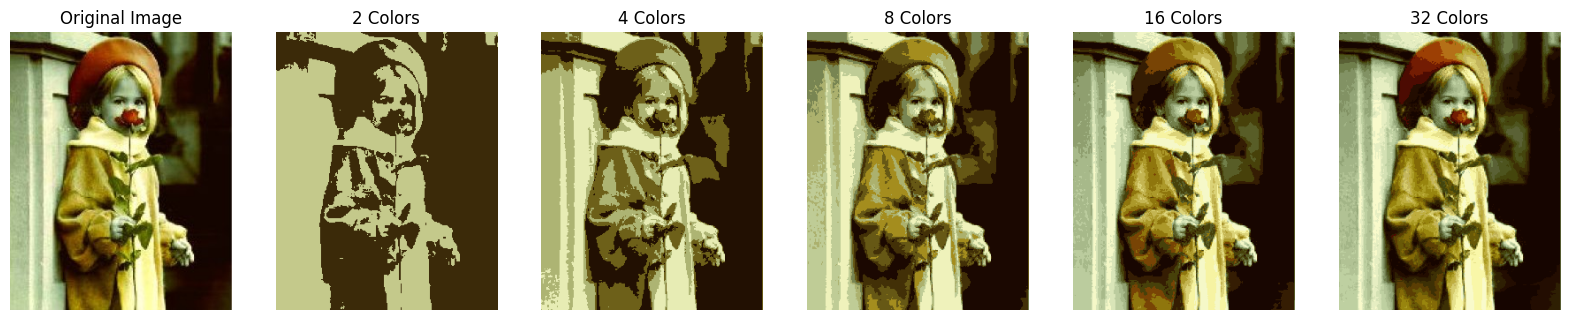

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

image = cv2.imread('Girl_and_rose.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_resized = image

pixel_values = image_resized.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

k_values = [2, 4, 8, 16, 32]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))

axes[0].imshow(image_resized)
axes[0].set_title('Original Image')
axes[0].axis('off')

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixel_values)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_resized.shape)

    axes[idx + 1].imshow(segmented_image)
    axes[idx + 1].set_title(f'{k} Colors')
    axes[idx + 1].axis('off')

plt.show()
